In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime 

In [2]:
df=pd.read_excel("D:/research paper serbia/SerbiaData/New folder/Data/Newdata/2010-2019/2010-2019.xlsx")

In [3]:
df.head()

,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density
0,2010-01-01 00:00:00,2010,1,1,0,0.0671,6.485,0.0,0.0,0.0,0.1962,0.5064,1.1686
1,2010-01-01 01:00:00,2010,1,1,1,0.1501,6.381,0.0,0.0,0.0,0.1905,0.5304,1.1691
2,2010-01-01 02:00:00,2010,1,1,2,0.2745,6.322,0.0,0.0,0.0,0.1850,0.5448,1.1691
3,2010-01-01 03:00:00,2010,1,1,3,0.3280,6.293,0.0,0.0,0.0,0.1797,0.5508,1.1686
4,2010-01-01 04:00:00,2010,1,1,4,0.3921,6.238,0.0,0.0,0.0,0.1748,0.5438,1.1677


In [4]:
df['date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str)
df['DayOfYear'] = pd.to_datetime(df['date']).dt.dayofyear

print(df[['Year', 'Month', 'Day', 'DayOfYear']])
df.head()

       Year  Month  Day  DayOfYear
0      2010      1    1          1
1      2010      1    1          1
2      2010      1    1          1
3      2010      1    1          1
4      2010      1    1          1
...     ...    ...  ...        ...
78883  2019     12   31        365
78884  2019     12   31        365
78885  2019     12   31        365
78886  2019     12   31        365
78887  2019     12   31        365

[78888 rows x 4 columns]


,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density,date,DayOfYear
0,2010-01-01 00:00:00,2010,1,1,0,0.0671,6.485,0.0,0.0,0.0,0.1962,0.5064,1.1686,2010-1-1,1
1,2010-01-01 01:00:00,2010,1,1,1,0.1501,6.381,0.0,0.0,0.0,0.1905,0.5304,1.1691,2010-1-1,1
2,2010-01-01 02:00:00,2010,1,1,2,0.2745,6.322,0.0,0.0,0.0,0.1850,0.5448,1.1691,2010-1-1,1
3,2010-01-01 03:00:00,2010,1,1,3,0.3280,6.293,0.0,0.0,0.0,0.1797,0.5508,1.1686,2010-1-1,1
4,2010-01-01 04:00:00,2010,1,1,4,0.3921,6.238,0.0,0.0,0.0,0.1748,0.5438,1.1677,2010-1-1,1


In [5]:
import math

latitude_deg = 44.7866
df['SolarDeclination'] = (-23.45) * np.cos(np.radians((360/365) * (10 + df['DayOfYear'])))
df['HourAngle'] = (df['Hour'] - 12) * 15
latitude_rad = np.radians(latitude_deg)
df['SolarZenithAngle'] = np.degrees(np.arccos(np.sin(np.radians(latitude_deg)) * np.sin(np.radians(df['SolarDeclination'])) + np.cos(np.radians(latitude_deg)) * np.cos(np.radians(df['SolarDeclination'])) * np.cos(np.radians(df['HourAngle']))))
df.head(20)                                 

,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density,date,DayOfYear,SolarDeclination,HourAngle,SolarZenithAngle
0,2010-01-01 00:00:00,2010,1,1,0,0.0671,6.485,0.0000,0.0000,0.0,0.1962,0.5064,1.1686,2010-1-1,1,-23.030845,-180,158.244245
1,2010-01-01 01:00:00,2010,1,1,1,0.1501,6.381,0.0000,0.0000,0.0,0.1905,0.5304,1.1691,2010-1-1,1,-23.030845,-165,155.028277
2,2010-01-01 02:00:00,2010,1,1,2,0.2745,6.322,0.0000,0.0000,0.0,0.1850,0.5448,1.1691,2010-1-1,1,-23.030845,-150,147.273914
3,2010-01-01 03:00:00,2010,1,1,3,0.3280,6.293,0.0000,0.0000,0.0,0.1797,0.5508,1.1686,2010-1-1,1,-23.030845,-135,137.515880
4,2010-01-01 04:00:00,2010,1,1,4,0.3921,6.238,0.0000,0.0000,0.0,0.1748,0.5438,1.1677,2010-1-1,1,-23.030845,-120,127.026873
5,2010-01-01 05:00:00,2010,1,1,5,0.4013,6.193,0.0000,0.0000,0.0,0.1705,0.5148,1.1664,2010-1-1,1,-23.030845,-105,116.401487
6,2010-01-01 06:00:00,2010,1,1,6,0.3737,6.478,18.2654,62.3352,0.0,0.1661,0.5978,1.1651,2010-1-1,1,-23.030845,-90,105.998175
7,2010-01-01 07:00:00,2010,1,1,7,0.3159,7.972,90.4019,250.2801,0.0,0.1597,0.6234,1.1630,2010-1-1,1,-23.030845,-75,96.116766
8,2010-01-01 08:00:00,2010,1,1,8,0.2799,9.440,161.0226,403.0211,0.0,0.1509,0.6424,1.1590,2010-1-1,1,-23.030845,-60,87.078020
9,2010-01-01 09:00:00,2010,1,1,9,0.2710,10.665,204.2851,502.1087,0.0,0.1404,0.7201,1.1547,2010-1-1,1,-23.030845,-45,79.265918


In [38]:
df.to_excel('solar_zenith_angle_dataset.xlsx', index=False)

In [6]:
lower_limit = 4
upper_limit = 17
df = df[(df['Hour'] >= lower_limit) & (df['Hour'] <= upper_limit)]

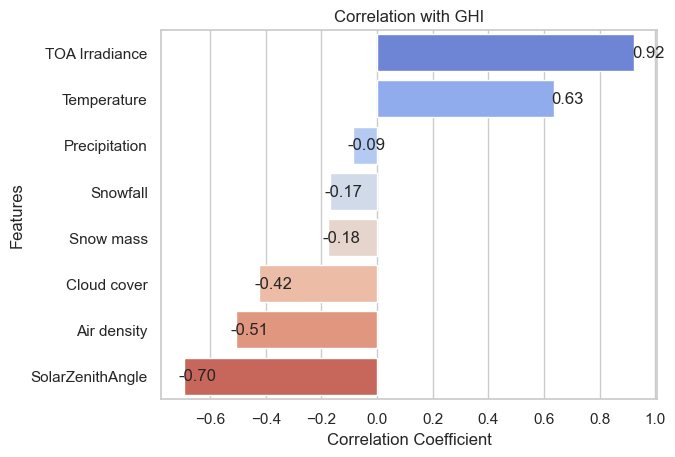

In [7]:
from sklearn import preprocessing

selected_feature = 'GHI'
selected_features = ['TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']
selected_data = df[selected_features + [selected_feature]].values

scaler = preprocessing.StandardScaler().fit(selected_data)
selected_data = scaler.transform(selected_data)
corr_coef = np.corrcoef(selected_data.T)
corr_with_selected_feature = corr_coef[-1, :-1]


corr_data = pd.DataFrame({'Selected Feature': selected_features, 'Correlation Coefficient': corr_with_selected_feature})
sns.set(style='whitegrid')
ax = sns.barplot(x='Correlation Coefficient', y='Selected Feature', data=corr_data, palette='coolwarm')


ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Features')
ax.set_title(f'Correlation with {selected_feature}')

for i, corr in enumerate(corr_with_selected_feature):
    ax.text(corr + 0.05, i, f'{corr:.2f}', ha='center', va='center')

plt.show()

In [8]:
max_value1 = df['GHI'].max()
min_value1 = df['GHI'].min()

max_value2 = df['Temperature'].max()
min_value2 = df['Temperature'].min()

max_value3 = df['Cloud cover'].max()
min_value3 = df['Cloud cover'].min()

max_value4 = df['TOA Irradiance'].max()
min_value4 = df['TOA Irradiance'].min()

max_value5 = df['Air density'].max()
min_value5 = df['Air density'].min()

max_value6 = df['SolarZenithAngle'].max()
min_value6 = df['SolarZenithAngle'].min()

print("GHI(max):", max_value1)
print("GHI(min):", min_value1)

print("Temp(max):", max_value2)
print("Temp(min):", min_value2)

print("Cloud cover(max):", max_value3)
print("Cloud cover(min):", min_value3)

print("TOA Irradiance(max):", max_value4)
print("TOA Irradiance(min):", min_value4)

print("Air density(max):", max_value5)
print("Air density(min):", min_value5)

print("SolarZenithAngle(max):", max_value6)
print("SolarZenithAngle(min):", min_value6)

GHI(max): 984.1595
GHI(min): 0.0
Temp(max): 38.319
Temp(min): -21.221
Cloud cover(max): 0.9974
Cloud cover(min): 0.0
TOA Irradiance(max): 1229.8772
TOA Irradiance(min): 0.0
Air density(max): 1.3446
Air density(min): 1.084
SolarZenithAngle(max): 127.29367510643537
SolarZenithAngle(min): 21.337468608723565


In [9]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['GHI','TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']
scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density,date,DayOfYear,SolarDeclination,HourAngle,SolarZenithAngle
4,2010-01-01 04:00:00,2010,1,1,4,0.120000,0.461186,0.000000,0.000000,0.0,0.002281,0.545218,0.321182,2010-1-1,1,-23.030845,-120,0.997482
5,2010-01-01 05:00:00,2010,1,1,5,0.122816,0.460430,0.000000,0.000000,0.0,0.002225,0.516142,0.316193,2010-1-1,1,-23.030845,-105,0.897201
6,2010-01-01 06:00:00,2010,1,1,6,0.114369,0.465217,0.018559,0.050684,0.0,0.002168,0.599358,0.311205,2010-1-1,1,-23.030845,-90,0.799016
7,2010-01-01 07:00:00,2010,1,1,7,0.096679,0.490309,0.091857,0.203500,0.0,0.002084,0.625025,0.303147,2010-1-1,1,-23.030845,-75,0.705757
8,2010-01-01 08:00:00,2010,1,1,8,0.085662,0.514965,0.163614,0.327692,0.0,0.001969,0.644075,0.287797,2010-1-1,1,-23.030845,-60,0.620450


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
X=df[['Hour','TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']]
y=df[['GHI']]

In [12]:
split_index = int(len(X) * 0.9)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

max_value = 984.1595
min_value = 0
original_rmse = rmse_rf * (max_value - min_value) + min_value
original_mae = mae_rf * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_rf)

C:\Users\suraj\AppData\Local\Temp\ipykernel_17464\156360335.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RMSE: 32.907940419872425
MAE: 19.470038212913696
R-squared: 0.985174724895634


In [62]:
y_test = np.squeeze(y_test)
max_val = 984.1595
min_val = 0
y_test_actual = y_test * (max_val - min_val) + min_val
y_pred_actual = y_pred * (max_val - min_val) + min_val
y_test_actual = np.round(y_test_actual, 3)
y_pred_actual = np.round(y_pred_actual, 3)

cross_checking = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_pred_actual})
print(cross_checking.head(20))

        Actual  Predicted
71000  200.975    239.850
71001  263.831    283.566
71002  282.427    295.582
71003  262.888    279.698
71004  215.166    221.363
71005  144.090    138.710
71006   68.005     64.873
71007    7.587      8.076
71008    0.000      0.000
71009    0.000      0.000
71020    0.000      0.000
71021    3.378      3.327
71022   75.460     77.088
71023  201.466    198.876
71024  326.926    298.627
71025  419.274    404.783
71026  456.768    440.856
71027  442.628    408.426
71028  369.106    346.504
71029  258.404    241.274


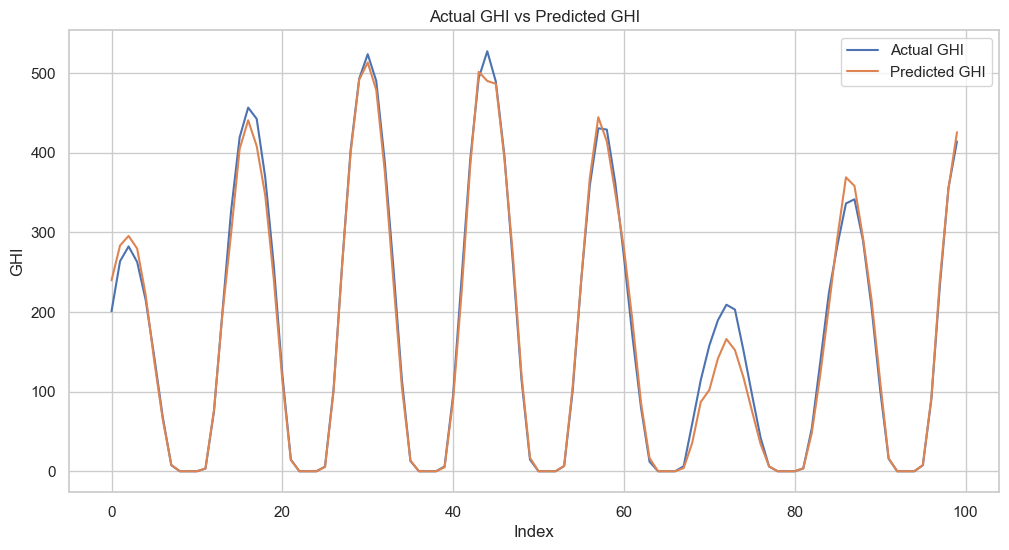

In [65]:
num_values = 100 
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(range(num_values), cross_checking['Actual'][:num_values], label='Actual GHI')
plt.plot(range(num_values), cross_checking['Predicted'][:num_values], label='Predicted GHI')

plt.xlabel('Index')
plt.ylabel('GHI')
plt.title('Actual GHI vs Predicted GHI')

plt.legend()
plt.show()

In [66]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

rmse_svr = mean_squared_error(y_test, y_pred, squared=False)
mae_svr = mean_absolute_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)


max_value = 984.1595
min_value = 0
original_rmse = rmse_svr * (max_value - min_value) + min_value
original_mae = mae_svr * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_svr)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 56.28165506241671
MAE: 43.456681325016454
R-squared: 0.9566354267664416


In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


max_value = 984.1595
min_value = 0
original_rmse = rmse_knn * (max_value - min_value) + min_value
original_mae = mae_knn * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_knn)

RMSE: 42.942997185562156
MAE: 26.86661286179922
R-squared: 0.9747543788041052


In [68]:
from sklearn.neural_network import MLPRegressor

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(40, 40, 40, 40, 40), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

rmse_ann = mean_squared_error(y_test, y_pred, squared=False)
mae_ann = mean_absolute_error(y_test, y_pred)
r2_ann = r2_score(y_test, y_pred)

max_value = 984.1595
min_value = 0
original_rmse = rmse_ann * (max_value - min_value) + min_value
original_mae = mae_ann * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_ann)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 37.11512238655535
MAE: 23.824817301021305
R-squared: 0.9811416735090648


In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

split_index = int(len(X) * 0.9)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)

rmse_lstm = mean_squared_error(y_test, y_pred, squared=False)
mae_lstm = mean_absolute_error(y_test, y_pred)
r2_lstm = r2_score(y_test, y_pred)

max_value = 984.1595
min_value = 0
original_rmse = rmse_lstm * (max_value - min_value) + min_value
original_mae = mae_lstm * (max_value - min_value) + min_value


print('RMSE (LSTM):', original_rmse)
print('MAE (LSTM):', original_mae)
print('R-squared (LSTM):', r2_lstm)

Epoch 1/40
1295/1295 [==============================] - 12s 6ms/step - loss: 0.0100
Epoch 2/40
1295/1295 [==============================] - 7s 6ms/step - loss: 0.0019
Epoch 3/40
1295/1295 [==============================] - 7s 6ms/step - loss: 0.0018
Epoch 4/40
1295/1295 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 5/40
1295/1295 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 6/40
1295/1295 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 7/40
1295/1295 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 8/40
1295/1295 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 9/40
1295/1295 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 10/40
1295/1295 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 11/40
1295/1295 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 12/40
1295/1295 [==============================] - 7s 6ms/step - loss: 0.0013
